In [4]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 435.7 kB/s eta 0:00:33
   ---------------------------------------- 0.1/14.3 MB 762.6 kB/s eta 0:00:19
    --------------------------------------- 0.2/14.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.3/14.3 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.7/14.3 MB 2.9 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/14.3 MB 4.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/14.3 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/14.3 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/14.3 MB 4.1 MB/s eta 0:00:04
   ------ --------------------------------- 2.5/14.3 MB 5.9 MB/s eta 0:00:03
   ---------- ----------------------------- 3.7/14.3 MB 7.5 MB/s eta 0:00:02
   ------

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items') 
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerse'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/Afreen Khan/Desktop/ECommerse'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "root",
                             database = "ecommerse")
cur = db.cursor()

1. List all unique cities where customers are located.

In [10]:
query = """SELECT DISTINCT(customer_city) FROM customers"""

cur.execute(query)
d = cur.fetchall()
d

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [43]:
df = pd.DataFrame(d, columns = ["Cities"])
df

,Cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


2. Count the number of orders placed in 2017.

In [23]:
query = """SELECT count(order_id) from orders 
            where year(order_purchase_timestamp) = 2017"""

cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are" , data[0][0]

('total orders placed in 2017 are', 90202)

3. Find the total sales per category.

In [33]:
query = """SELECT products.product_category category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category"""

cur.execute(query)
data = cur.fetchall()
data

[('perfumery', 4053909.28),
 ('Furniture Decoration', 11441411.13),
 ('telephony', 3895056.41),
 ('bed table bath', 13700429.37),
 ('automotive', 6818354.65),
 ('computer accessories', 12682643.57),
 ('housewares', 8758065.04),
 ('babies', 4318765.28),
 ('toys', 4952301.52),
 ('Furniture office', 5174611.9),
 ('Cool Stuff', 6237584.0),
 ('HEALTH BEAUTY', 13258984.96),
 ('pet Shop', 2490151.76),
 ('General Interest Books', 517558.08),
 ('stationary store', 2539520.56),
 ('Watches present', 11433733.43),
 ('PCs', 2232972.39),
 ('climatization', 729365.28),
 ('Construction Tools Construction', 1931805.04),
 ('sport leisure', 11137020.47),
 ('Bags Accessories', 1497210.32),
 ('electronics', 2078856.8),
 ('Casa Construcao', 1093162.32),
 ('Games consoles', 1563843.03),
 ('Fashion Bags and Accessories', 1745266.24),
 ('home appliances', 764258.16),
 ('Garden tools', 6706246.01),
 ('Agro Industria e Comercio', 949844.88),
 (None, 2022413.68),
 ('audio', 482596.96),
 ('technical books', 199323

In [35]:
df = pd.DataFrame(data, columns = ["Category" , "Sales"])
df

,Category,Sales
0,perfumery,4053909.28
1,Furniture Decoration,11441411.13
2,telephony,3895056.41
3,bed table bath,13700429.37
4,automotive,6818354.65
...,...,...
69,cds music dvds,9595.44
70,La Cuisine,23308.24
71,Fashion Children's Clothing,6285.36
72,PC Gamer,17395.44


4. Calculate the percentage of orders that were paid in installments.

In [51]:
query = """SELECT (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments"""

cur.execute(query)
data = cur.fetchall()
'The percentage of orders that were paid in installments is', data[0][0]

('The percentage of orders that were paid in installments is',
 Decimal('99.9981'))

5. Count the number of customers from each state.

In [109]:
query = """SELECT customer_state, count(customer_id)
from customers
group by customer_state"""

cur.execute(query)
data = cur.fetchall()
data

[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

In [111]:
df = pd.DataFrame(data, columns = ["State" , "No.of Customers"])
df

,State,No.of Customers
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704
5,RS,10932
6,PA,1950
7,GO,4040
8,ES,4066
9,BA,6760


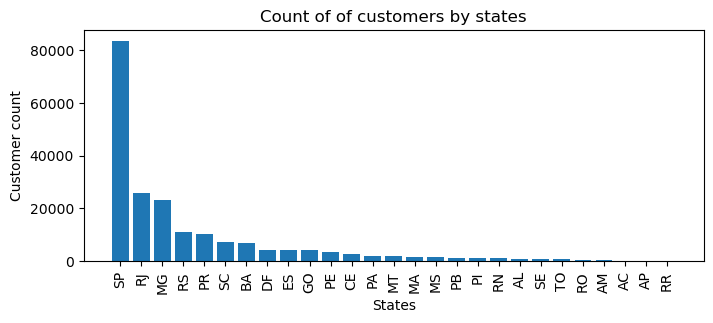

In [113]:
df = df.sort_values(by = "No.of Customers", ascending = False)
plt.figure(figsize = (8,3))
plt.bar(df["State"], df["No.of Customers"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Customer count")
plt.title("Count of of customers by states")
plt.show()

1. Calculate the number of orders per month in 2018.

In [123]:
query = """SELECT monthname(order_purchase_timestamp) months, count(order_id)
from orders 
where year(order_purchase_timestamp) = 2018
group by months"""

cur.execute(query)
data = cur.fetchall()
data

[('July', 12584),
 ('August', 13024),
 ('February', 13456),
 ('June', 12334),
 ('March', 14422),
 ('January', 14538),
 ('May', 13746),
 ('April', 13878),
 ('September', 32),
 ('October', 8)]

In [125]:
df = pd.DataFrame(data, columns = ["Months" , "No.of Orders"])
df

,Months,No.of Orders
0,July,12584
1,August,13024
2,February,13456
3,June,12334
4,March,14422
5,January,14538
6,May,13746
7,April,13878
8,September,32
9,October,8


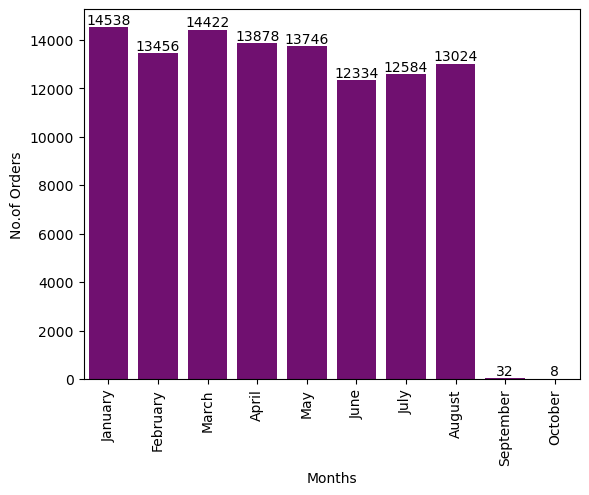

In [127]:
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]
ax = sns.barplot(x = df["Months"],y = df["No.of Orders"], data= df, order = o, color = "purple")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

2. Find the average number of products per order, grouped by customer city.

In [148]:
query = """WITH count_per_order as
(SELECT orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city"""

cur.execute(query)
data = cur.fetchall()
data

[('sao paulo', Decimal('4.62')),
 ('sao jose dos campos', Decimal('4.55')),
 ('porto alegre', Decimal('4.70')),
 ('indaial', Decimal('4.46')),
 ('treze tilias', Decimal('5.09')),
 ('rio de janeiro', Decimal('4.59')),
 ('mario campos', Decimal('5.33')),
 ('guariba', Decimal('4.00')),
 ('cuiaba', Decimal('4.79')),
 ('franca', Decimal('5.01')),
 ('tocos', Decimal('4.00')),
 ('januaria', Decimal('4.73')),
 ('campinas', Decimal('4.63')),
 ('embu-guacu', Decimal('4.96')),
 ('cerquilho', Decimal('4.67')),
 ('belo horizonte', Decimal('4.57')),
 ('taubate', Decimal('4.54')),
 ('arcos', Decimal('4.48')),
 ('monte mor', Decimal('4.31')),
 ('vianopolis', Decimal('5.33')),
 ('cacapava', Decimal('4.65')),
 ('sao jose da tapera', Decimal('4.00')),
 ('belford roxo', Decimal('4.36')),
 ('pedro leopoldo', Decimal('5.00')),
 ('arroio do sal', Decimal('5.14')),
 ('sao bernardo do campo', Decimal('4.57')),
 ('brasilia', Decimal('4.52')),
 ('ribeirao pires', Decimal('4.49')),
 ('contagem', Decimal('4.58')),

In [153]:
df = pd.DataFrame(data, columns = ["Customer_city" , "Average_Products_per_Order"])
df.head(10)

,Customer_city,Average_Products_per_Order
0,sao paulo,4.62
1,sao jose dos campos,4.55
2,porto alegre,4.70
3,indaial,4.46
4,treze tilias,5.09
5,rio de janeiro,4.59
6,mario campos,5.33
7,guariba,4.00
8,cuiaba,4.79
9,franca,5.01


3. Calculate the percentage of total revenue contributed by each product category.

In [12]:
query = """SELECT upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value)from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""

cur.execute(query)
data = cur.fetchall()
data

[('BED TABLE BATH', 96.28),
 ('HEALTH BEAUTY', 93.18),
 ('COMPUTER ACCESSORIES', 89.13),
 ('FURNITURE DECORATION', 80.4),
 ('WATCHES PRESENT', 80.35),
 ('SPORT LEISURE', 78.26),
 ('HOUSEWARES', 61.55),
 ('AUTOMOTIVE', 47.91),
 ('GARDEN TOOLS', 47.13),
 ('COOL STUFF', 43.83),
 ('FURNITURE OFFICE', 36.36),
 ('TOYS', 34.8),
 ('BABIES', 30.35),
 ('PERFUMERY', 28.49),
 ('TELEPHONY', 27.37),
 ('STATIONARY STORE', 17.85),
 ('PET SHOP', 17.5),
 ('PCS', 15.69),
 ('ELECTRONICS', 14.61),
 (None, 14.21),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 13.58),
 ('MUSICAL INSTRUMENTS', 13.1),
 ('ELECTROSTILE', 12.68),
 ('FASHION BAGS AND ACCESSORIES', 12.26),
 ('FIXED TELEPHONY', 11.64),
 ('GAMES CONSOLES', 10.99),
 ('BAGS ACCESSORIES', 10.52),
 ('CASA CONSTRUCAO', 7.68),
 ('ROOM FURNITURE', 7.65),
 ('ELECTRICES 2', 7.0),
 ('AGRO INDUSTRIA E COMERCIO', 6.67),
 ('HOME APPLIANCES', 5.37),
 ('CLIMATIZATION', 5.13),
 ('HOUSE COMFORT', 4.74),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 4.2),
 ('CONSTRUCTI

In [14]:
df = pd.DataFrame(data, columns = ["Category" , "Sales Percentage"])
df.head(5)

,Category,Sales Percentage
0,BED TABLE BATH,96.28
1,HEALTH BEAUTY,93.18
2,COMPUTER ACCESSORIES,89.13
3,FURNITURE DECORATION,80.40
4,WATCHES PRESENT,80.35


4. Identify the correlation between product price and the number of times a product has been purchased

In [76]:
query="""select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
data

[('HEALTH BEAUTY', 87030, 130.16),
 ('sport leisure', 77769, 114.34),
 ('Cool Stuff', 34164, 167.36),
 ('computer accessories', 70443, 116.51),
 ('Watches present', 53919, 201.14),
 ('housewares', 62676, 90.79),
 ('electronics', 24903, 57.91),
 (None, 14427, 112.0),
 ('toys', 37053, 117.55),
 ('bed table bath', 100035, 93.3),
 ('Games consoles', 10233, 138.49),
 ('automotive', 38115, 139.96),
 ('Furniture Decoration', 75006, 87.56),
 ('home appliances', 6939, 103.98),
 ('telephony', 40905, 71.21),
 ('Construction Tools Construction', 8361, 155.73),
 ('perfumery', 30771, 116.74),
 ('stationary store', 22653, 91.75),
 ('Room Furniture', 4527, 137.01),
 ('Fashion Bags and Accessories', 18279, 75.25),
 ('Garden tools', 39123, 111.63),
 ('Fashion Underwear and Beach Fashion', 1179, 72.84),
 ('pet Shop', 17523, 110.07),
 ('SIGNALIZATION AND SAFETY', 1791, 108.09),
 ('ELECTRICES 2', 2142, 476.12),
 ("Fashion Women's Clothing", 432, 58.41),
 ('Bags Accessories', 9828, 128.6),
 ('General Intere

In [53]:
df = pd.DataFrame(data, columns = ["Category" , "Order Count", "Price"])
df.head(5)

,Category,Order Count,Price
0,HEALTH BEAUTY,87030,130.16
1,sport leisure,77769,114.34
2,Cool Stuff,34164,167.36
3,computer accessories,70443,116.51
4,Watches present,53919,201.14


In [55]:
#to find the correlation

import numpy as np
arr1 = df["Order Count"]
arr2 = df["Price"]

a = np.corrcoef([arr1,arr2])
print("The correlation between price and number of times a product has been purchased is", a[0][1])

The correlation between price and number of times a product has been purchased is -0.10631514167157556


5. Calculate the total revenue generated by each seller, and rank them by revenue

In [77]:
query = """select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
data

[('7c67e1448b00f6e969d365cea6b010ab', 4564502.165719271, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 2773998.3585619926, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 2711207.4278875887, 3),
 ('1f50f920176fa81dab994f9023523100', 2612280.781148538, 4),
 ('53243585a1d6dc2643021fd1853d8905', 2564127.7244796753, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 2449973.873831928, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 2377495.0884490013, 7),
 ('955fee9216a65b617aa5c0531780ce60', 2126900.704520384, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 1858619.0688285828, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 1666207.8873567581, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 1616919.741435036, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 1521277.200230509, 12),
 ('25c5c91f63607446a97b143d2d535d31', 1444812.657953024, 13),
 ('a1043bafd471dff536d0c462352beb48', 1389212.1917023659, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 1339779.0606365204, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 1307871.361175537, 16),
 ('620c87

In [83]:
df = pd.DataFrame(data, columns = ["Seller_id" , "Revenue", "Rank"])
df.head(5)

,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,4.564502e+06,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,2.773998e+06,2
2,4a3ca9315b744ce9f8e9374361493884,2.711207e+06,3
3,1f50f920176fa81dab994f9023523100,2.612281e+06,4
4,53243585a1d6dc2643021fd1853d8905,2.564128e+06,5


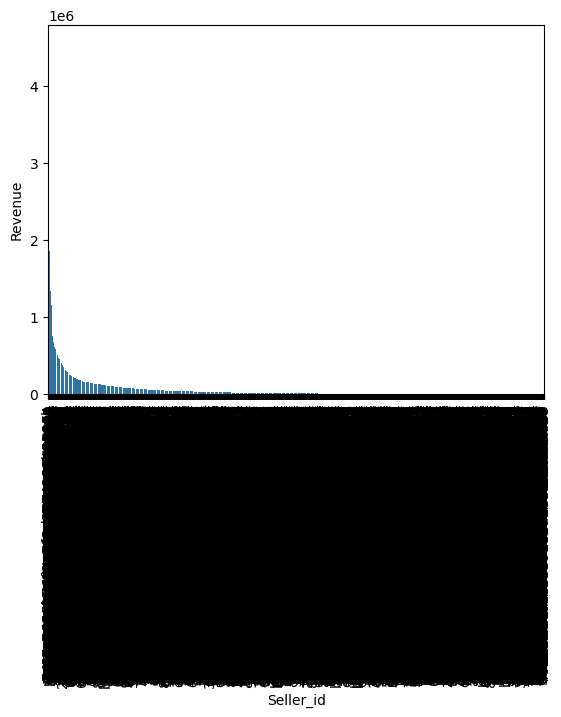

In [86]:
sns.barplot(x = "Seller_id", y = "Revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

1. Calculate the moving average of order values for each customer over their order history.

In [88]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

cur.execute(query)
data = cur.fetchall()
data

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.74,
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41,
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2

In [93]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
934969,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934970,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934971,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
934972,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


2. Calculate the cumulative sales per month for each year.

In [95]:
query = """
select years, months, payment, sum(payment)
over(order by years, months) cumulative_sales from
(select year(orders.order_purchase_timestamp)as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months)as a"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, 9, 2270.16, 2270.16),
 (2016, 10, 531814.32, 534084.48),
 (2016, 12, 176.58, 534261.0599999999),
 (2017, 1, 1246392.36, 1780653.42),
 (2017, 2, 2627172.09, 4407825.51),
 (2017, 3, 4048772.4, 8456597.91),
 (2017, 4, 3760092.27, 12216690.18),
 (2017, 5, 5336269.38, 17552959.56),
 (2017, 6, 4601487.42, 22154446.979999997),
 (2017, 7, 5331446.28, 27485893.259999998),
 (2017, 8, 6069566.88, 33555460.14),
 (2017, 9, 6549862.05, 40105322.19),
 (2017, 10, 7017100.92, 47122423.11),
 (2017, 11, 10753945.2, 57876368.31),
 (2017, 12, 7905613.32, 65781981.63),
 (2018, 1, 10035037.61, 75817019.24000001),
 (2018, 2, 8932170.06, 84749189.30000001),
 (2018, 3, 10436869.08, 95186058.38000001),
 (2018, 4, 10447069.33, 105633127.71000001),
 (2018, 5, 10385839.36, 116018967.07000001),
 (2018, 6, 9214924.51, 125233891.58000001),
 (2018, 7, 9598866.74, 134832758.32000002),
 (2018, 8, 9201827.89, 144034586.21000004),
 (2018, 9, 39955.86, 144074542.07000005),
 (2018, 10, 5307.03, 144079849.10000005)]

In [101]:
df = pd.DataFrame(data, columns = ["Years" , "Months", "Payment", "Cumulative Sales"])
df.head(5)

,Years,Months,Payment,Cumulative Sales
0,2016,9,2270.16,2270.16
1,2016,10,531814.32,534084.48
2,2016,12,176.58,534261.06
3,2017,1,1246392.36,1780653.42
4,2017,2,2627172.09,4407825.51


In [103]:
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,2270.16,2.270160e+03
1,2016,10,531814.32,5.340845e+05
2,2016,12,176.58,5.342611e+05
3,2017,1,1246392.36,1.780653e+06
4,2017,2,2627172.09,4.407826e+06
5,2017,3,4048772.40,8.456598e+06
6,2017,4,3760092.27,1.221669e+07
7,2017,5,5336269.38,1.755296e+07
8,2017,6,4601487.42,2.215445e+07
9,2017,7,5331446.28,2.748589e+07


3. Calculate the year-over-year growth rate of total sales 

In [15]:
query = """with a as(select year(orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, payment, lag(payment, 1) over(order by years) previous_year from a"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, 534261.06, None),
 (2017, 65247720.55, 534261.06),
 (2018, 78297867.47, 65247720.55)]

In [13]:
df = pd.DataFrame(data, columns = ["years", "sales", "previous_year"])
df

,years,sales,previous_year
0,2016,534261.06,NaN
1,2017,65247720.55,534261.06
2,2018,78297867.47,65247720.55


In [17]:
query = """with a as(select year(orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/ lag(payment, 1) over(order by years))*100 from a"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, None), (2017, 12112.703757597454), (2018, 20.00092387901818)]

In [19]:
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [32]:
query = """with a as(select customers.customer_id, 
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()
data

[(None,)]

Identify the top 3 customers who spent the most money in each year.

In [35]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3"""

cur.execute(query)
data = cur.fetchall()
data

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 12811.950439453125, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 12606.659912109375, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 11050.020263671875, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 122976.720703125, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 62363.79052734375, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 60539.94140625, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 65473.9189453125, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 62299.8896484375, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 43284.95947265625, 3)]

In [37]:
df = pd.DataFrame(data, columns = ["years", "id", "payment", "rank"])
df

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,12811.950439,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,12606.659912,2
2,2016,4a06381959b6670756de02e07b83815f,11050.020264,3
3,2017,1617b1357756262bfa56ab541c47bc16,122976.720703,1
4,2017,c6e2731c5b391845f6800c97401a43a9,62363.790527,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,60539.941406,3
6,2018,ec5b2ba62e574342386871631fafd3fc,65473.918945,1
7,2018,f48d464a0baaea338cb25f816991ab1f,62299.889648,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,43284.959473,3


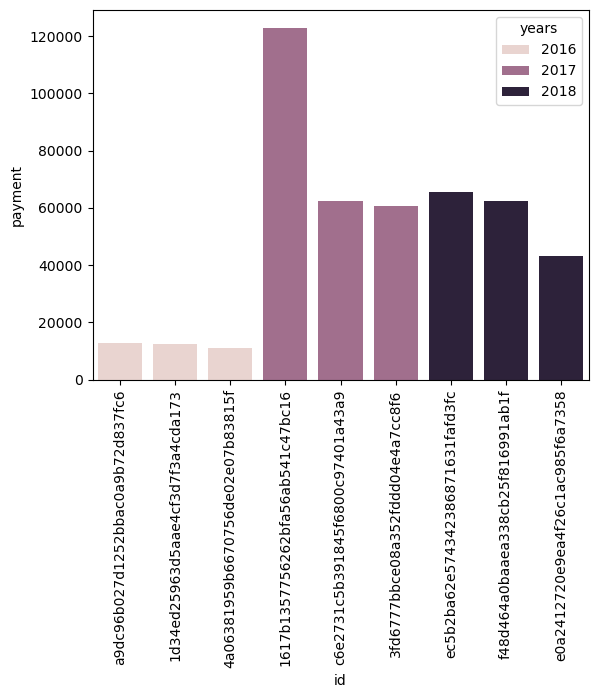

In [41]:
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()